In [76]:
%%bigquery
CREATE OR REPLACE TABLE `calcium-complex-407414.github_data.data` AS
WITH Languages AS (
    SELECT
        repo_name,
        language.name AS language,
        SUM(language.bytes) AS total_bytes,
        ROW_NUMBER() OVER (PARTITION BY repo_name ORDER BY SUM(language.bytes) DESC) AS row_num
    FROM 
        `bigquery-public-data.github_repos.languages`, UNNEST(language) AS language
    GROUP BY
        repo_name, language
),
Messages AS (
    SELECT 
        message, 
        (SELECT AS STRUCT value FROM UNNEST(repo_name) AS value LIMIT 1).value AS repo_name
    FROM 
        `bigquery-public-data.github_repos.commits`
)
SELECT 
    c.message, 
    l.language, 
    l.repo_name
FROM 
    Messages c
JOIN 
    Languages l ON c.repo_name = l.repo_name
WHERE 
    total_bytes / NULLIF((SELECT SUM(total_bytes) FROM Languages WHERE repo_name = l.repo_name), 0) > 0.3
ORDER BY 
    c.message DESC;

Query is running:   0%|          |

""


In [77]:
%%bigquery positive
WITH Positive as (
    SELECT
      language,
      COUNTIF(REGEXP_CONTAINS(message, r'(?i)\b(?:happy|joyful|excit(?:ed|ing)|celebrat(?:e|ing|es)|triumph(?:ed|ing)?|accomplish(?:ed|ing)?|victor(?:y|ious|ies)?|succeed(?:ed|ing)?|lov(?:e|ed|ing)|content(?:ment)?|proud(?:ly)?|amaz(?:ed|ing)|thrill(?:ed|ing)|elat(?:ed|ing)|cheerful(?:ly)?|exhilarat(?:e|ed|ing)|delight(?:ed|ing)|ecstat(?:ic|ically)|jubi(?:lant|lantl(?:y)?)|overjoyed)\b')) AS regex_matched_count,
      COUNT(*) AS total_count
    FROM 
        `calcium-complex-407414.github_data.data`
    GROUP BY 
        language
    ORDER BY 
        total_count DESC
    LIMIT 15
)
SELECT
    language,
    regex_matched_count / total_count * 100 as percent
FROM
    Positive
ORDER BY 
    percent DESC

Query is running:   0%|          |

Downloading:   0%|          |

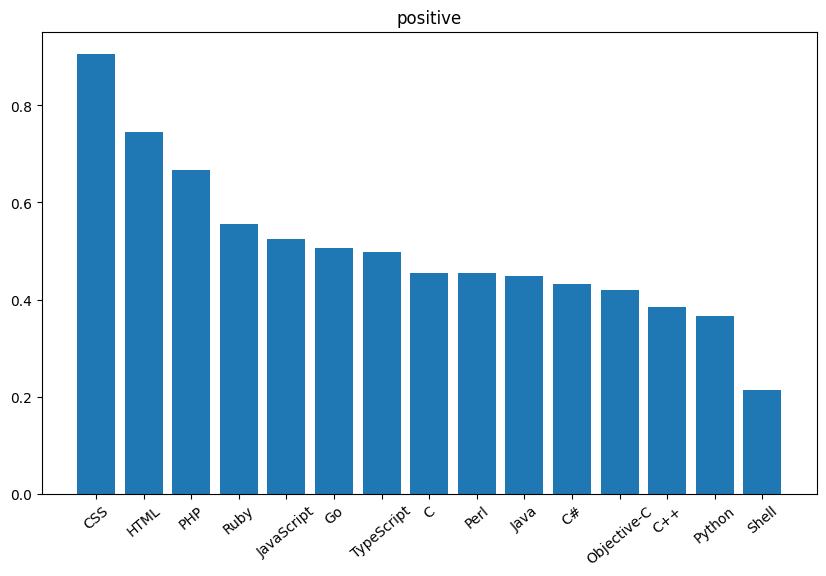

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(positive['language'], positive['percent']) 
plt.title('positive') 
plt.xticks(rotation=40)
plt.show()

In [79]:
%%bigquery stressed
WITH Stressed as (
    SELECT
      language,
      COUNTIF(REGEXP_CONTAINS(message, r'(?i)\b(?:stress(?:ed|ing)?|urgent|rushed|critical|overwhelm\w*|emergency|pressure|anger\w*|angry|annoyed|mad|anxious|frustrat\w*|desperate|tens\w*|nervous|worried)\b')) AS regex_matched_count,
      COUNT(*) AS total_count
    FROM 
        `calcium-complex-407414.github_data.data`
    GROUP BY 
        language
    ORDER BY 
        total_count DESC
    LIMIT 15
)
SELECT
    language,
    regex_matched_count / total_count * 100 as percent
FROM
    Stressed
ORDER BY 
    percent DESC

Query is running:   0%|          |

Downloading:   0%|          |

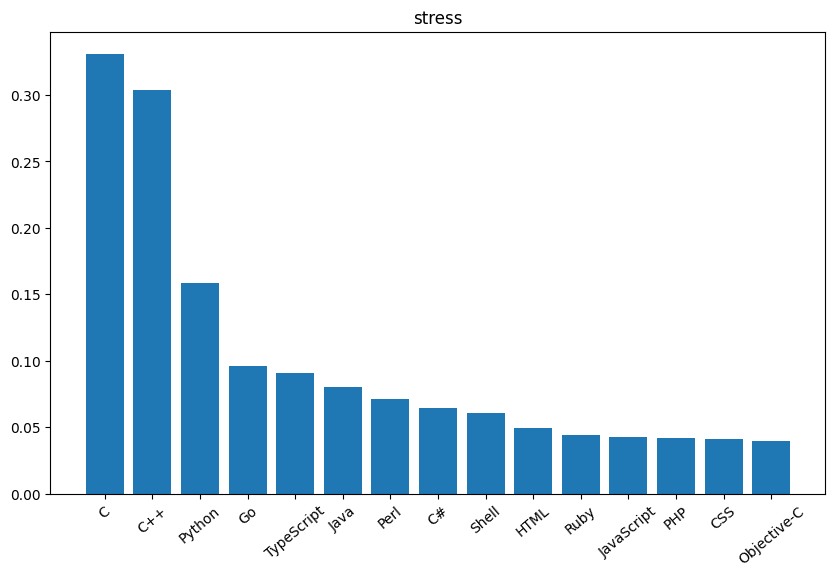

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(stressed['language'], stressed['percent']) 
plt.title('stress') 
plt.xticks(rotation=40)
plt.show()

In [81]:
%%bigquery swear
WITH Swear as (
    SELECT
      language,
      COUNTIF(REGEXP_CONTAINS(message, r'(?i)\b(?:wtf|hell|ass|bitch|bi\*ch|f\*ck|f\*cking?|f\*cked?|sh\*t+y?|crap+y?|damn|goddamn|screw|suck|piss off)\b')) AS regex_matched_count,
      COUNT(*) AS total_count
    FROM 
        `calcium-complex-407414.github_data.data`
    GROUP BY 
        language
    ORDER BY 
        total_count DESC
    LIMIT 15
)
SELECT
    language,
    regex_matched_count / total_count * 100 as percent
FROM
    Swear
ORDER BY 
    percent DESC

Query is running:   0%|          |

Downloading:   0%|          |

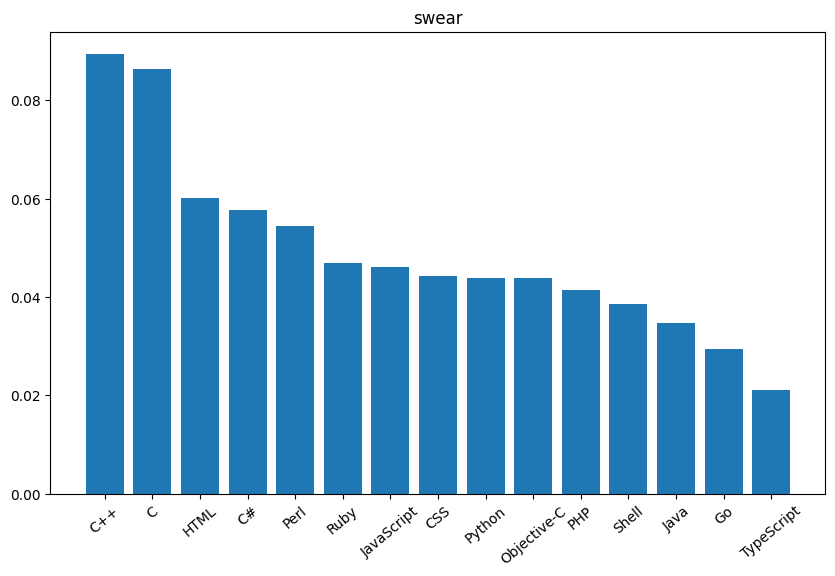

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(swear['language'], swear['percent']) 
plt.title('swear') 
plt.xticks(rotation=40)
plt.show()

In [83]:
%%bigquery issue
WITH Issue as (
    SELECT
      language,
      COUNTIF(REGEXP_CONTAINS(message, r'(?i)\b(?:bug[sy]?(ed|gy)?|defect|error[sy]?|problem[sy]?|issue[sy]?|fix[esd]?|corrected|glitch|flaw)\b')) AS regex_matched_count,
      COUNT(*) AS total_count
    FROM 
        `calcium-complex-407414.github_data.data`
    GROUP BY 
        language
    ORDER BY 
        total_count DESC
    LIMIT 15
)
SELECT
    language,
    regex_matched_count / total_count * 100 as percent
FROM
    Issue
ORDER BY 
    percent DESC

Query is running:   0%|          |

Downloading:   0%|          |

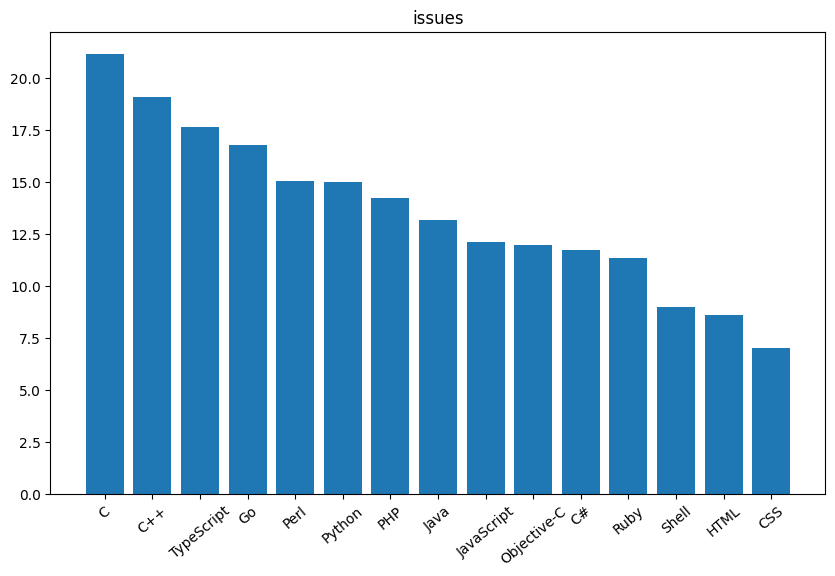

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(issue['language'], issue['percent']) 
plt.title('issues') 
plt.xticks(rotation=40)
plt.show()

In [86]:
%%bigquery optimistic
WITH Optimistic as (
    SELECT
      language,
      COUNTIF(REGEXP_CONTAINS(message, r'(?i)\b(?:optimiz(?:e|ed|ing|es)|fine-tun(?:e|ed|ing|es)|enhanc(?:e|ed|ing|es)|improv(?:e|ed|ing|es)|boost(?:e|ed|ing|s)|upgrad(?:e|ed|ing|es)|maximiz(?:e|ed|ing|es)|polish(?:e|ed|ing|es))\b')) AS regex_matched_count,
      COUNT(*) AS total_count
    FROM 
        `calcium-complex-407414.github_data.data`
    GROUP BY 
        language
    ORDER BY 
        total_count DESC
    LIMIT 15
)
SELECT
    language,
    regex_matched_count / total_count * 100 as percent
FROM
    Optimistic
ORDER BY 
    percent DESC

Query is running:   0%|          |

Downloading:   0%|          |

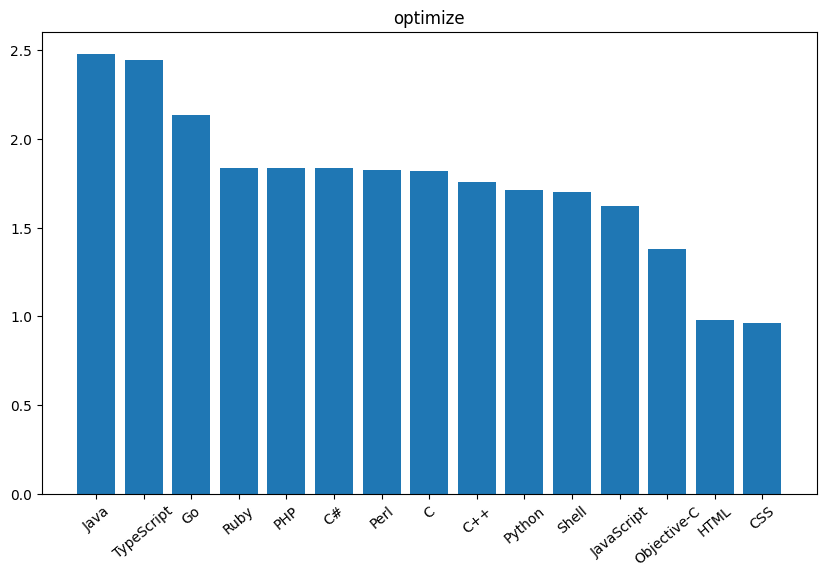

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(optimistic['language'], optimistic['percent']) 
plt.title('optimize') 
plt.xticks(rotation=40)
plt.show()